# Lecture 8 : Vectors in $\mathbb{R}^n$

# Part 1 : Working with MNIST Images

## Clone the materials repo on github to access datafiles.

In [1]:
!git clone https://github.com/jasonrwilson/cmda3634_materials

Cloning into 'cmda3634_materials'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 85 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (85/85), 777.23 KiB | 3.10 MiB/s, done.
Resolving deltas: 100% (42/42), done.


## Copy the lecture 8 materials into our local workspace.

In [2]:
!cp cmda3634_materials/L08/* .

## Print the first line of the data file *mnist1000.txt*.

In [3]:
!head -1 mnist1000.txt

# 1000 784


## The first line is a **comment** that contains information about the data contained in the file.

## The first number 1000 gives the number of points in the file.

## The second number 784 gives the dimension of each point in the file.  

## In this case the dimension of each point is 784 since each image is 28 x 28.

## A script to view two MNIST images.

In [4]:
!cat mnist1000.txt | python3 mnist.py mnist2.png 2 4

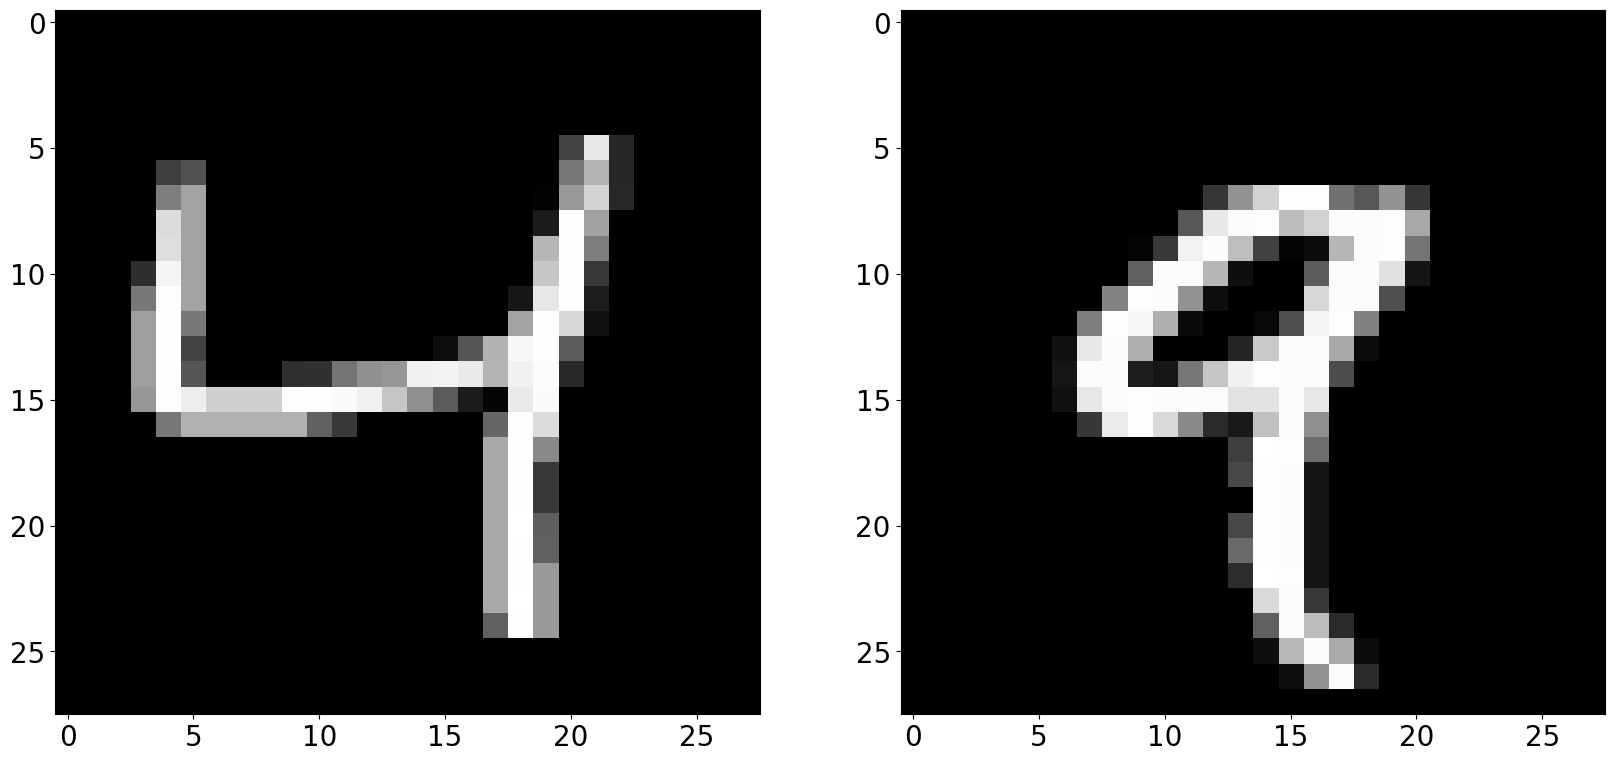

In [5]:
from IPython import display
display.Image("mnist2.png")

# Part 2 : Averaging Vectors in $\mathbb{R}^n$.

## Here is a C program that prints the average of vectors in $\mathbb{R}^n$.

## Using a C structure to store a vector works well when we know the size of the vectors at compile time.  For example, in the previous lecture we used a C structure to store vectors in $\mathbb{R}^2$.

## Unfortunately, the size of a C structure cannot be specified at runtime.

## Instead, we will store a vector in $\mathbb{R}^n$ using an array in C.

## Note that the size of array will be dynamic (not known until runtime).

## Dynamic arrays in C cannot be initialized with one line.

## We use a function to initialize a variable sized array to 0s and a function to read a vector from stdin.

## Note that we need to pass the dimension $n$ of the vectors as an argument.

## We also use C functions to compute the sum of two vectors and the scalar multiple of a vector.

In [6]:
%%writefile mean.c
#include <stdio.h>

// v = 0
void vec_zero (double v[], int dim) {
    for (int i=0;i<dim;i++) {
        v[i] = 0;
    }
}

// read a vector from stdin
// returns the number of elements read in
int vec_read_stdin (double v[], int dim) {
    for (int i=0;i<dim;i++) {
        if (scanf("%lf",&(v[i])) != 1) { // could also use v+i
            return i;
        }
    }
    return dim;
}

// w = u + v
void vec_add (double u[], double v[], double w[], int dim) {
    for (int i=0;i<dim;i++) {
        w[i] = u[i] + v[i];
    }
}

// w = cv
void vec_scalar_mult (double v[], double c, double w[], int dim) {
    for (int i=0;i<dim;i++) {
        w[i] = c*v[i];
    }
}

// print a vector using the given format specifier
void vec_print (double v[], char* format, int dim) {
    for (int i=0;i<dim;i++) {
        printf (format,v[i]);
    }
    printf ("\n");
}

int main () {

    // read the number of points and the dimension of each point
    int num_points, dim;
    if (scanf("%*c %d %d",&num_points, &dim) != 2) {
        printf ("error reading the number of points and the dimension\n");
        return 1;
    }

    // The size of a C array can be specified using a variable.
    // Variable size arrays in C cannot be initialized with one line.
    // double sum[dim] = { 0 }; (this will not compile)
    double sum[dim];
    double average[dim];
    double next[dim];

    // We must initialize variable sized arrays using a loop.
    // To improve readability of the code we use a function.
    vec_zero(sum,dim);

    // Read vectors from stdin and accumulate the sum
    for (int i=0;i<num_points;i++) {
        if (vec_read_stdin(next,dim) != dim) {
            printf ("error reading the next point from stdin\n");
            return 1;
        }
        vec_add (sum,next,sum,dim);
    }

    // divide the sum by the number of points to get the average
    vec_scalar_mult(sum,1.0/num_points,average,dim);

    // print the results
    vec_print (average,"%.2f ",dim);
}

Writing mean.c


In [7]:
!gcc -o mean mean.c

In [8]:
!cat points100.txt | ./mean

-0.09 0.03 


## Here is an example where we find the average of 3 points in $\mathbb{R}^4$.

In [9]:
!echo \# 3 4  1.6 2 3 4  5 6 7.3 8  9 10 11.6 12 | ./mean

5.20 6.00 7.30 8.00 


# Part 3 : C Header Files and Implementation Files

## Let's write a C Header file and implementation file for our vector functions.

## We will also write the new vector functions *vec_norm_sq* and *vec_dist_sq*.  

## A C header file typically contains type declarations as well as function interfaces.  

## The types and functions in a C header file work together to provide a certain functionality.

## For example, *stdio.h* includes types and function interfaces for input and output.  

## In our case we want to group functions that make it easier to work with $n$-dimensional vectors in C.

## Here is our *vec.h* header file.  Note that the function declarations only provide the interface not the implementations.

## We will need a separate *vec.c* implementation file that contains the implementations of the functions.

## Note that our *vec.h* header file contains a protection to avoid multiple includes.  

In [10]:
%%writefile vec.h
#ifndef VEC_H
#define VEC_H

// v = 0
void vec_zero (double v[], int dim);

// read a vector from stdin
// returns the number of elements read in
int vec_read_stdin (double v[], int dim);

// w = u + v
void vec_add (double u[], double v[], double w[], int dim);

// w = cv
void vec_scalar_mult (double v[], double c, double w[], int dim);

// print a vector using the given format specifier
void vec_print (double v[], char* format, int dim);

// calculate the norm squared of a vector
double vec_norm_sq (double v[], int dim);

// calculate the distance squared between two vectors
double vec_dist_sq (double u[], double v[], int dim);

#endif

Writing vec.h


## Here is the implementation file *vec.c*.

In [11]:
%%writefile vec.c
#include <stdio.h>

// v = 0
void vec_zero (double v[], int dim) {
    for (int i=0;i<dim;i++) {
        v[i] = 0;
    }
}

// read a vector from stdin
// returns the number of elements read in
int vec_read_stdin (double v[], int dim) {
    for (int i=0;i<dim;i++) {
        if (scanf("%lf",&(v[i])) != 1) { // could also use v+i
            return i;
        }
    }
    return dim;
}

// w = u + v
void vec_add (double u[], double v[], double w[], int dim) {
    for (int i=0;i<dim;i++) {
        w[i] = u[i] + v[i];
    }
}

// w = cv
void vec_scalar_mult (double v[], double c, double w[], int dim) {
    for (int i=0;i<dim;i++) {
        w[i] = c*v[i];
    }
}

// print a vector using the given format specifier
void vec_print (double v[], char* format, int dim) {
    for (int i=0;i<dim;i++) {
        printf (format,v[i]);
    }
    printf ("\n");
}

// calculate the norm squared of a vector
double vec_norm_sq (double v[], int dim) {
    double norm_sq = 0;
    for (int i=0;i<dim;i++) {
        norm_sq += v[i]*v[i];
    }
    return norm_sq;
}

// calculate the distance squared between two vectors
double vec_dist_sq (double u[], double v[], int dim) {
    double dist_sq = 0;
    for (int i=0;i<dim;i++) {
        dist_sq += (u[i]-v[i])*(u[i]-v[i]);
    }
    return dist_sq;
}

Writing vec.c


# Part 4 : Closest and Farthest

## Let's next use our new C header and implementation files to create a program that finds the index of the point closest to the origin as well as the index of the point farthest from the origin.  

## These problems are equivalent to minimizing and maximizing the norm squared of the vectors.

## We include *vec.h* to gain access to our vector function interfaces.

In [12]:
%%writefile minmax.c
#include <stdio.h>
#include <float.h>
#include <math.h>
#include "vec.h"

int main () {

    // read the number of points and the dimension of each point
    int num_points, dim;
    if (scanf("%*c %d %d",&num_points, &dim) != 2) {
        printf ("error reading the number of points and the dimension\n");
        return 1;
    }

    double max_norm_sq = 0;
    double min_norm_sq = DBL_MAX;
    int closest, farthest;
    double next[dim];
    // Read vectors from stdin and keep track of closest/farthest indices
    for (int i=0;i<num_points;i++) {
        if (vec_read_stdin(next,dim) != dim) {
            printf ("error reading the next point from stdin\n");
            return 1;
        }
        double norm_sq = vec_norm_sq(next,dim);
        if (norm_sq > max_norm_sq) {
            max_norm_sq = norm_sq;
            farthest = i;
        }
        if (norm_sq < min_norm_sq) {
            min_norm_sq = norm_sq;
            closest = i;
        }
    }

    // print the results
    printf ("closest has length %.4f and index %d\n",sqrt(min_norm_sq),closest);
    printf ("farthest has length %.4f and index %d\n",sqrt(max_norm_sq),farthest);
}

Writing minmax.c


## Note that we compile both minmax.c and vec.c.

## We also include the math library using *-lm*.

In [13]:
!gcc -o minmax minmax.c vec.c -lm

In [14]:
!cat points100.txt | ./minmax

closest has length 0.0904 and index 21
farthest has length 0.9969 and index 23


## To demonstrate the flexibility of our program we run on the MNIST dataset with points in $\mathbb{R}^{784}$.

In [15]:
!cat mnist1000.txt | ./minmax

closest has length 1204.4654 and index 604
farthest has length 3734.9391 and index 756


## We can visualize the closest and farthest MNIST images using Python.

In [16]:
!cat mnist1000.txt | python3 mnist.py minmax.png 604 756

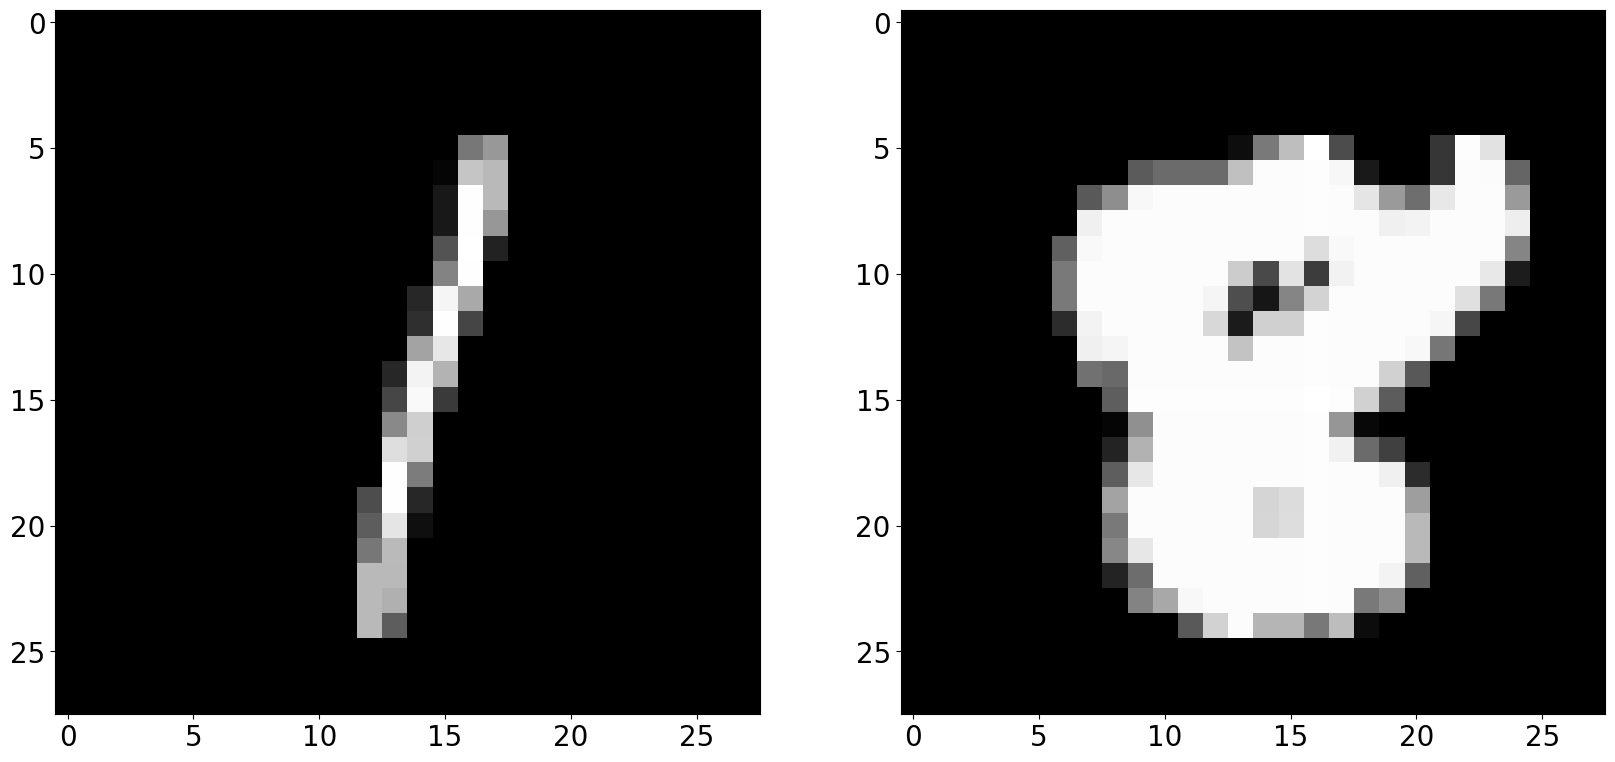

In [17]:
from IPython import display
display.Image("minmax.png")

# Part 5 : Finding the Extreme Pair in $\mathbb{R}^n$.

## We will write a C program that finds the extreme pair in $\mathbb{R}^n$.  

## To find the extreme pair we will need to maximize $$\| \mathbf{u} - \mathbf{v} \|$$

## which is equivalent to maximizing $$\| \mathbf{u} - \mathbf{v} \|^2$$

## We will store the dataset in C using a two-dimensional array.  

## Working with two-dimensional arrays in C is similar to other languages such as Java and Python.

## Here is an example program that multiples a $3 \times 3$ matrix by a vector in $\mathbb{R}^3$.

In [18]:
%%writefile matvec.c
#include <stdio.h>

int main () {
    double A[3][3] = { { 1, 2.5, 3 }, { 4, 5.8, 6 }, { 7, 8, 9.3 } };
    double x[3] = { 1, 1, 1 };
    double b[3] = { 0 };
    for (int i=0;i<3;i++) {
        for (int j=0;j<3;j++) {
            b[i] += A[i][j]*x[j];
        }
    }
    printf ("b = { %.2f, %.2f, %.2f }\n",b[0],b[1],b[2]);
}

Writing matvec.c


In [19]:
!gcc -o matvec matvec.c

In [20]:
!./matvec

b = { 6.50, 15.80, 24.30 }


## Here is code for a C program that computes the extreme pair.  

In [21]:
%%writefile extreme.c
#include <stdio.h>
#include <math.h>
#include "vec.h"

int main () {

    // read the number of points and the dimension of each point
    int num_points, dim;
    if (scanf("%*c %d %d",&num_points, &dim) != 2) {
        printf ("error reading the number of points and the dimension\n");
        return 1;
    }

    // Read vectors from stdin and store them in a 2d array
    double data[num_points][dim];
    for (int i=0;i<num_points;i++) {
        if (vec_read_stdin(data[i],dim) != dim) {
            printf ("error reading the next point from stdin\n");
            return 1;
        }
    }

    // find the extreme pair
    double max_dist_sq = 0;
    int extreme1, extreme2;
    for (int i=0;i<num_points-1;i++) {
        for (int j=i+1;j<num_points;j++) {
            double dist_sq = vec_dist_sq(data[i],data[j],dim);
            if (dist_sq > max_dist_sq) {
                max_dist_sq = dist_sq;
                extreme1 = i;
                extreme2 = j;
            }
        }
    }

    // output the results
    printf ("Extreme Distance = %.2f\n",sqrt(max_dist_sq));
    printf ("Extreme Pair = %d %d\n",extreme1,extreme2);
}

Writing extreme.c


In [22]:
!gcc -o extreme extreme.c vec.c -lm

## Let's first run the extreme program on some 2d datasets.

In [23]:
!cat points9.txt | ./extreme

Extreme Distance = 8.06
Extreme Pair = 5 8


In [24]:
!cat points100.txt | ./extreme

Extreme Distance = 1.95
Extreme Pair = 85 89


## Next, let's run the extreme program on the MNIST dataset.

In [25]:
!cat mnist1000.txt | ./extreme

Extreme Distance = 3797.52
Extreme Pair = 121 426


## We can visualize the extreme pair of MNIST images using Python.

In [26]:
!cat mnist1000.txt | python3 mnist.py extreme.png 121 426

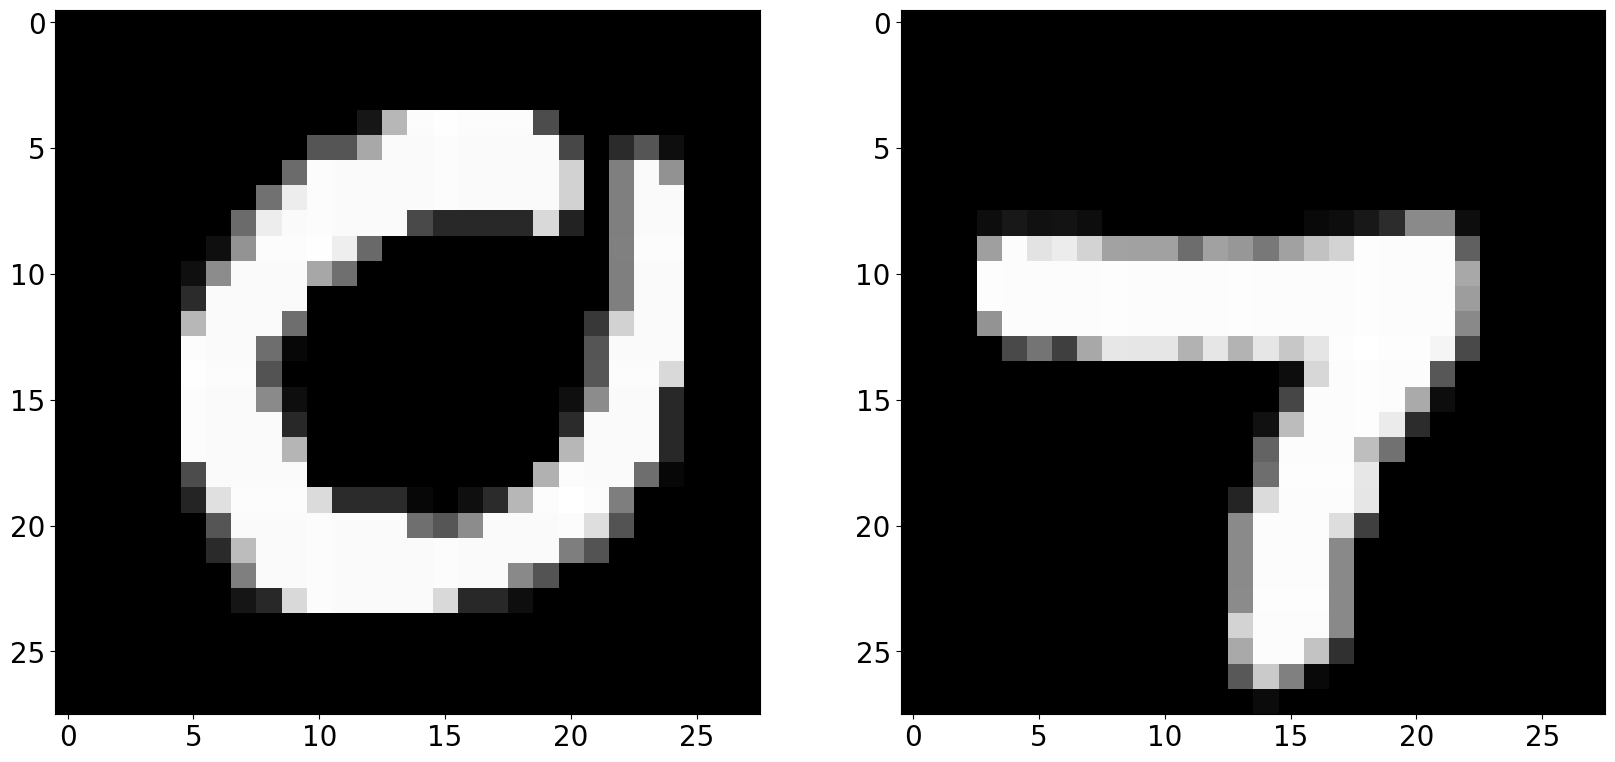

In [27]:
from IPython import display
display.Image("extreme.png")

## Next, let's try the code on a set of 2000 MNIST Test images.

In [28]:
!cat mnist2000.txt | ./extreme

/bin/bash: line 1:   811 Broken pipe             cat mnist2000.txt
       812 Segmentation fault      (core dumped) | ./extreme


## What caused the segmentation fault?  

## Hint 1: How many bytes is the *double data[2000][784]* array?

## Hint 2: Here is the stack size (in MB).

In [29]:
!ulimit -s

8192
